In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
from torch.utils.tensorboard import SummaryWriter
from model import SkipGramLanguageModeler
import pickle
import numpy as np
import matplotlib.pyplot as plt
from helper import reduce_to_k_dim, plot_embeddings
import warnings
warnings.filterwarnings('ignore')

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
torch.cuda.get_device_name(device)

'GeForce GTX 1660 Ti'

In [2]:
with open('vocabulary.pickle', 'rb') as handle:
    vocab = pickle.load(handle)

with open('bigrams_dataset.pickle', 'rb') as handle:
    bigrams_dataset = pickle.load(handle)

word_to_ix = {word: i for i, word in enumerate(vocab)}
ix_to_word = { i: word for i, word in enumerate(vocab)}

x_data = []
y_data = []
for bigram in bigrams_dataset:
    x_data.append(word_to_ix[bigram[0]])
    y_data.append(word_to_ix[bigram[1]])

In [3]:
class Word_dataset(Dataset):
    
    def __init__(self, x_data, y_data):
        self.x_data = torch.tensor(x_data).to(device)
        self.y_data = torch.tensor(y_data).to(device)
        self.length = len(x_data)
        
    def __getitem__(self,index):
        return self.x_data[index], self.y_data[index]
    
    def __len__(self):
        return self.length

train_dataset = Word_dataset(x_data, y_data)
train_loader = DataLoader(dataset=train_dataset, batch_size = 2**14+10000, shuffle=True)

iterator = iter(train_loader)
x, y = iterator.next()
(x.shape, y.shape)

(torch.Size([26384]), torch.Size([26384]))

In [4]:
EMBEDDING_DIM = 300
net = SkipGramLanguageModeler(len(vocab), EMBEDDING_DIM)
net.to(device)
criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(net.parameters())

Epoch: 0 Loss: 117.32975101470947
saved vector_space_epoch_0.png


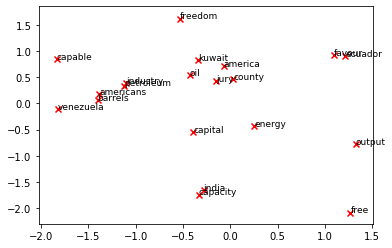

Model Saved! at epoch no.: 0
Epoch: 1 Loss: 112.84798812866211
Epoch: 2 Loss: 109.1261100769043
Epoch: 3 Loss: 105.73873805999756
saved vector_space_epoch_3.png


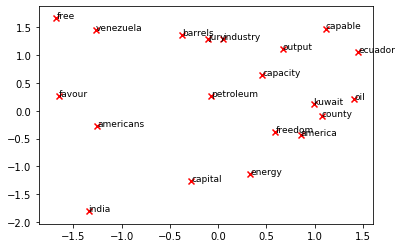

Model Saved! at epoch no.: 3
Epoch: 4 Loss: 102.67612743377686
Epoch: 5 Loss: 99.81910991668701
Epoch: 6 Loss: 97.16752052307129
saved vector_space_epoch_6.png


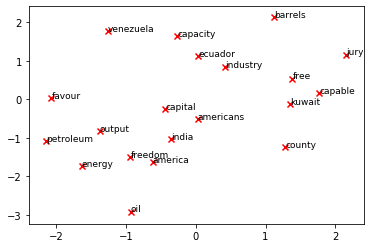

Model Saved! at epoch no.: 6
Epoch: 7 Loss: 94.55618906021118
Epoch: 8 Loss: 92.1769232749939
Epoch: 9 Loss: 89.88454532623291
saved vector_space_epoch_9.png


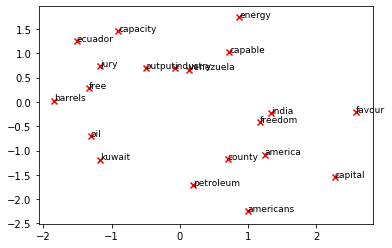

Model Saved! at epoch no.: 9
Epoch: 10 Loss: 87.84858083724976
Epoch: 11 Loss: 85.94622755050659
Epoch: 12 Loss: 84.28599500656128
saved vector_space_epoch_12.png


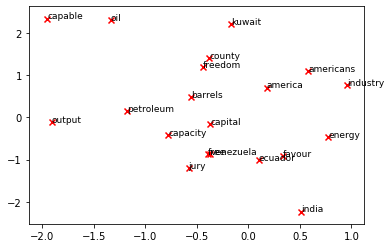

Model Saved! at epoch no.: 12
Epoch: 13 Loss: 82.73321485519409
Epoch: 14 Loss: 81.39900541305542
Epoch: 15 Loss: 80.13844919204712
saved vector_space_epoch_15.png


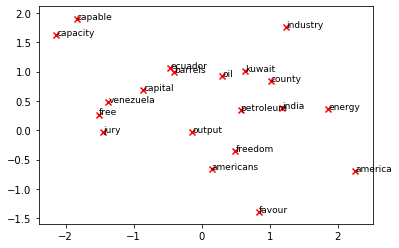

Model Saved! at epoch no.: 15
Epoch: 16 Loss: 79.10362482070923
Epoch: 17 Loss: 78.04053211212158
Epoch: 18 Loss: 77.15743827819824
saved vector_space_epoch_18.png


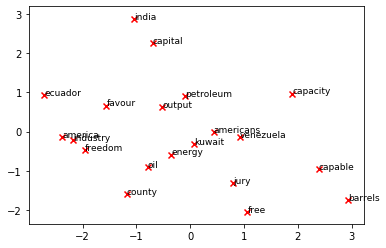

Model Saved! at epoch no.: 18
Epoch: 19 Loss: 76.28327465057373
Epoch: 20 Loss: 75.56935501098633
Epoch: 21 Loss: 74.92412042617798
saved vector_space_epoch_21.png


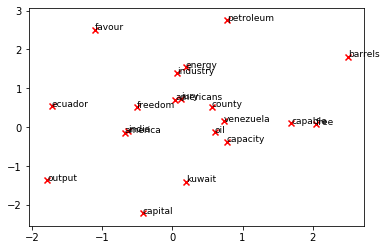

Model Saved! at epoch no.: 21
Epoch: 22 Loss: 74.29705476760864
Epoch: 23 Loss: 73.73881721496582
Epoch: 24 Loss: 73.17046022415161
saved vector_space_epoch_24.png


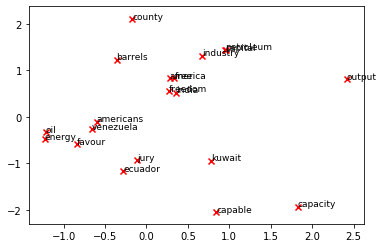

Model Saved! at epoch no.: 24
Epoch: 25 Loss: 72.67029237747192
Epoch: 26 Loss: 72.21419334411621
Epoch: 27 Loss: 71.74505805969238
saved vector_space_epoch_27.png


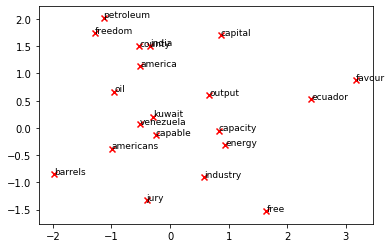

Model Saved! at epoch no.: 27
Epoch: 28 Loss: 71.34825897216797
Epoch: 29 Loss: 70.9875898361206
Epoch: 30 Loss: 70.63928031921387
saved vector_space_epoch_30.png


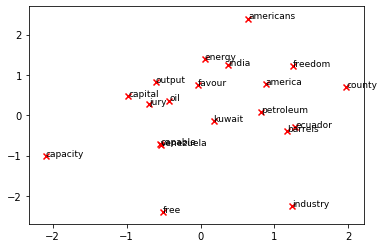

Model Saved! at epoch no.: 30
Epoch: 31 Loss: 70.20505952835083
Epoch: 32 Loss: 69.92099523544312
Epoch: 33 Loss: 69.57403516769409
saved vector_space_epoch_33.png


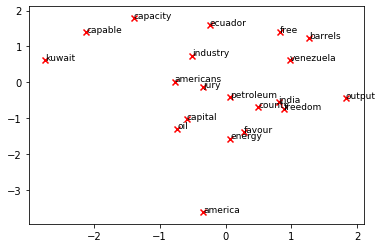

Model Saved! at epoch no.: 33
Epoch: 34 Loss: 69.2593765258789
Epoch: 35 Loss: 69.03485536575317
Epoch: 36 Loss: 68.73474979400635
saved vector_space_epoch_36.png


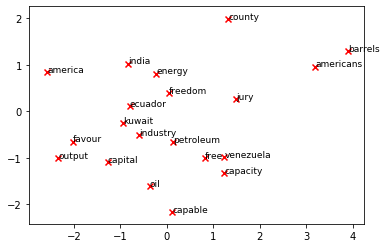

Model Saved! at epoch no.: 36
Epoch: 37 Loss: 68.44111490249634
Epoch: 38 Loss: 68.17606735229492
Epoch: 39 Loss: 67.98499202728271
saved vector_space_epoch_39.png


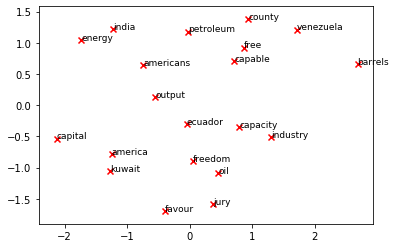

Model Saved! at epoch no.: 39
Epoch: 40 Loss: 67.67265605926514
Epoch: 41 Loss: 67.50670385360718
Epoch: 42 Loss: 67.27086067199707
saved vector_space_epoch_42.png


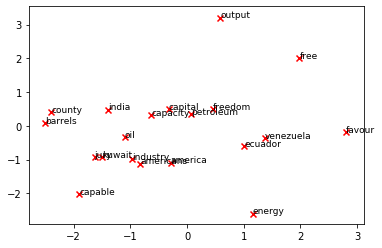

Model Saved! at epoch no.: 42
Epoch: 43 Loss: 67.07566976547241
Epoch: 44 Loss: 66.91544771194458
Epoch: 45 Loss: 66.63067770004272
saved vector_space_epoch_45.png


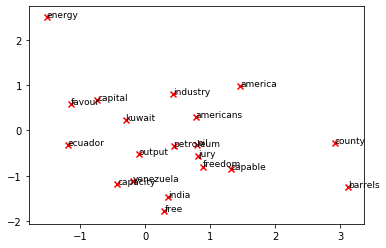

Model Saved! at epoch no.: 45
Epoch: 46 Loss: 66.48044967651367
Epoch: 47 Loss: 66.2817325592041
Epoch: 48 Loss: 66.10335969924927
saved vector_space_epoch_48.png


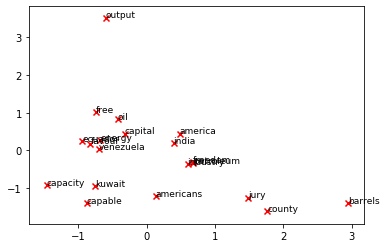

Model Saved! at epoch no.: 48
Epoch: 49 Loss: 65.94678688049316
Epoch: 50 Loss: 65.79865646362305
Epoch: 51 Loss: 65.627197265625
saved vector_space_epoch_51.png


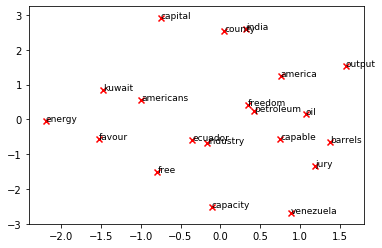

Model Saved! at epoch no.: 51
Epoch: 52 Loss: 65.46270513534546
Epoch: 53 Loss: 65.32503509521484
Epoch: 54 Loss: 65.1512680053711
saved vector_space_epoch_54.png


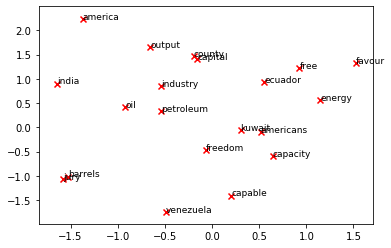

Model Saved! at epoch no.: 54
Epoch: 55 Loss: 64.96150779724121
Epoch: 56 Loss: 64.87875413894653
Epoch: 57 Loss: 64.74692869186401
saved vector_space_epoch_57.png


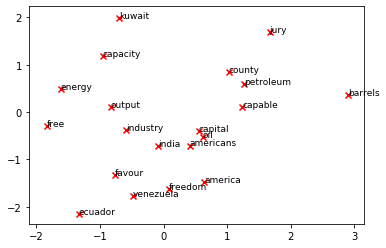

Model Saved! at epoch no.: 57
Epoch: 58 Loss: 64.62547445297241
Epoch: 59 Loss: 64.47964096069336


KeyboardInterrupt: 

In [5]:
losses = []

iteration = 10001
k = 0
vocab_ind_np = torch.tensor(list(ix_to_word.keys())).cuda()
words = ['barrels', 'ecuador', 'energy', 'industry', 'kuwait', 'oil', 'output', 'petroleum', 'venezuela','free',
         'freedom','jury','favour','capable','capacity','capital', 'county','india','america', 'americans']

for epoch in range(iteration):
    total_loss = 0
    
    for data in train_loader:
        x, y = data
        log_probs = net.forward(x)
        loss = criterion(log_probs, y).to(device)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        net.zero_grad()
        
    losses.append(total_loss)
    
    if epoch %3 == 0:
        print('Epoch: {} Loss: {}'.format(epoch, total_loss))
    
    if epoch %50 == 0:
        
        PATH = './saved_model/saved_model_{}.pth'.format(k)
        torch.save(net.state_dict(), PATH)
        print("\n Model Saved! at epoch no.: {}".format(epoch))
        k+=1
        
        embedding_matrix = net.embedding_outputs(vocab_ind_np).cpu().detach().numpy()
        embedding_matrix_reduced = reduce_to_k_dim(embedding_matrix, k=2)
        plot_embeddings(embedding_matrix_reduced, word_to_ix, words, epoch)
        
print('\n Done Training')